# Healy chapter 3 figures (2022-09-02)

_by A. Maurits van der Veen_  

_Modification history:_  
_2022-08-28 - Initial version_  
_2022-09-02 - Clean-up_  

This notebook provides python code to parallel the R code in Healy's Data Visualization book. 

It uses the `plotnine` module in python, which replicates most of ggplot.


## 0. General preparation

The code relies on several python modules, which may need to be installed first. To do so, uncomment the next X code snippets.

- `plotnine` is the main module replicating ggplot
- `mizani` provides axis label formatting
- `pyreadr` reads R-format datasets


In [1]:
# !pip install plotnine


In [2]:
# !pip install mizani


In [3]:
# !pip install pyreadr


In [4]:
import math
import numpy as np

import pandas as pd
# import geopandas as gpd  # Not necessary until chapter 7

import matplotlib.pyplot as plt

from plotnine import *  # alternative: import plotnine as p9 and always use prefix
from mizani.formatters import currency_format

import pyreadr


## Chapter 3 - Make a plot

The headings below correspond to chapter sections in the book. If a heading number is skipped (as is the case for 3.1 and 3.2 here), that is because there are no figures in those sections.

In [5]:
# Retrieve & load gapminder data

localfolder = '/Users/yourname/Downloads/'  # Change to local path

remotefolder = 'https://github.com/jennybc/gapminder/blob/main/data/'

targetfile = 'gapminder.rdata'
pyreadr.download_file(remotefolder + targetfile + '?raw=true', 
                      localfolder + targetfile)
newdata = pyreadr.read_r(localfolder + targetfile)
gapminder = newdata['gapminder']


In [6]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


### 3.3 Mappings link data to things you see

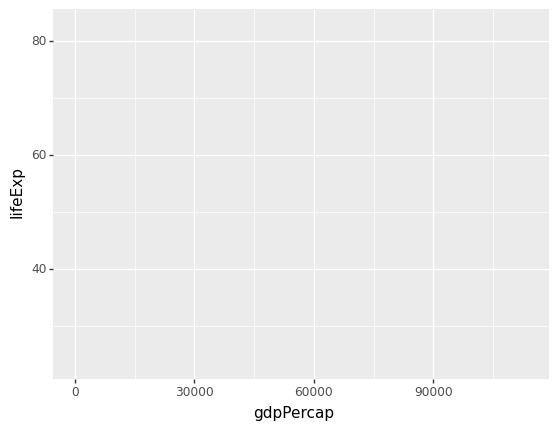

<ggplot: (316546624)>

In [7]:
# Figure 3.3 -- don't panic, this is supposed to be an empty chart!

p = ggplot(data = gapminder,
           mapping = aes(x = 'gdpPercap', y = 'lifeExp'))
p

### 3.4 Build your plots layer by layer

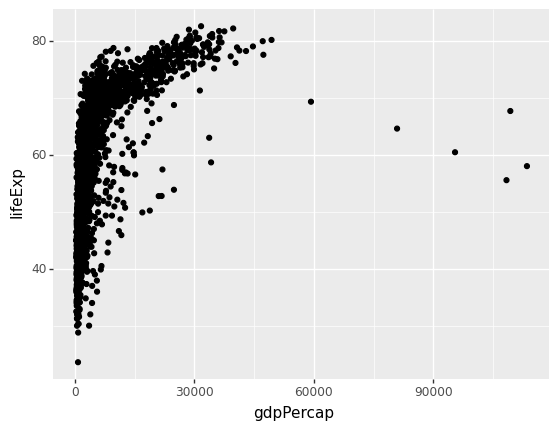

<ggplot: (316562592)>

In [8]:
# Figure 3.4

p + geom_point()

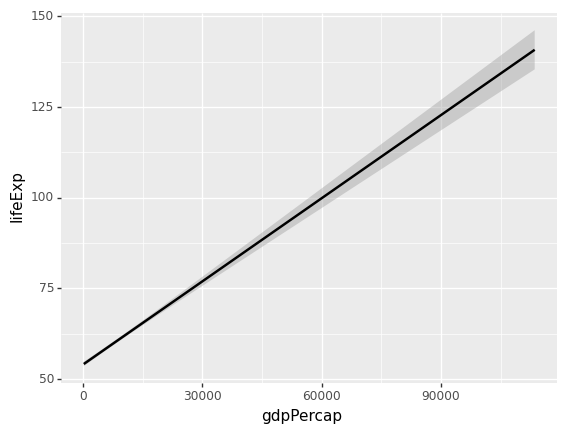

<ggplot: (316649457)>

In [9]:
# Figure 3.5 -- note that plotnine uses a different default method

p + geom_smooth()

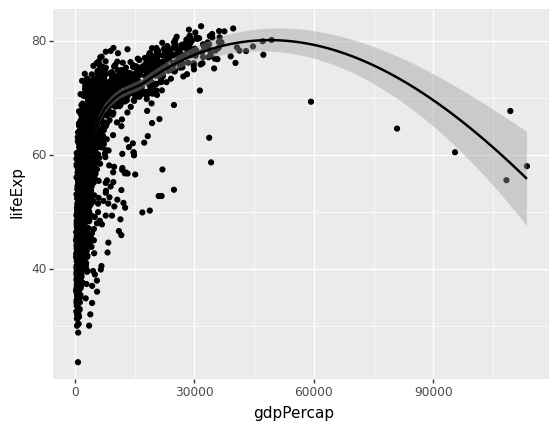

<ggplot: (316742738)>

In [10]:
# Figure 3.6, but now specifying the method we're interested in

p + geom_point() + geom_smooth(method = 'loess')


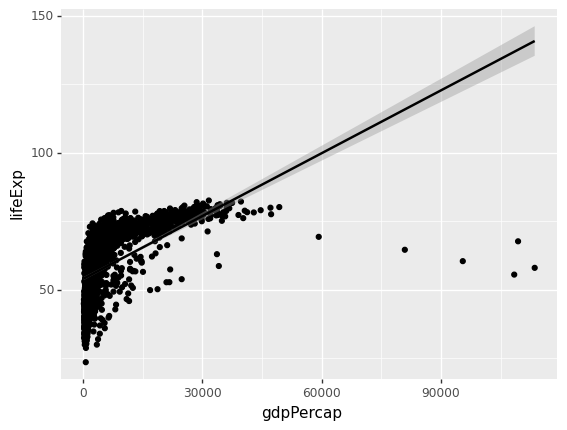

<ggplot: (327195173)>

In [11]:
# Figure 3.7, produced using Healy's code from figure 3.6 
# (again, because R's ggplot and plotnine use a different default method)

p + geom_point() + geom_smooth()

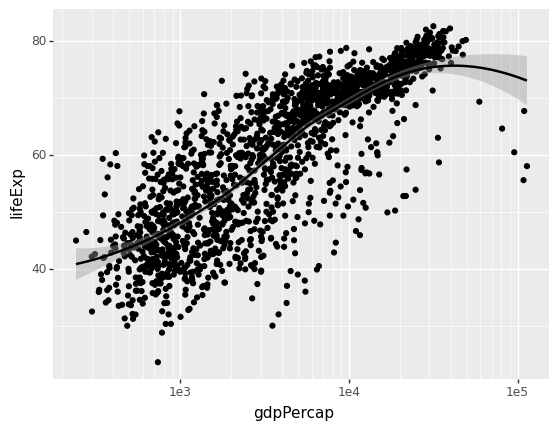

<ggplot: (327241704)>

In [12]:
# Figure 3.8 (slightly different method)

p + geom_point() + geom_smooth(method = 'loess') + scale_x_log10()

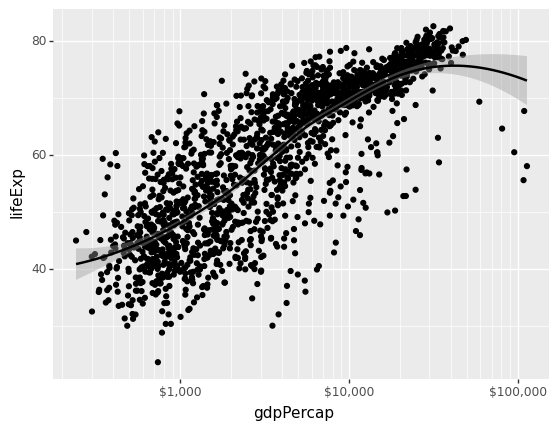

<ggplot: (327305954)>

In [13]:
# Figure 3.9 (slightly different method): addition of dollar signs to x axis

# Note that the code for the dollar signs is slighly different
# Adding a \ after the plus sign allows us to run across multiple lines

p + geom_point() +\
    geom_smooth(method = 'loess') +\
    scale_x_log10(labels = currency_format(digits=0, big_mark=','))

### 3.5 Mapping aesthetics vs. setting them

In [33]:
# Attempt at figure 3.10 -- note: this causes an error in plotnine (which is fine!)
# The problem is that 'purple' is not a variable in the dataframe

# In ggplot, in contrast, although the code is not correct, 
# a default interpretation ensures that something does get plotted

p = ggplot(data = gapminder,
           mapping = aes(x = 'gdpPercap', y = 'lifeExp', color = 'purple'))

p + geom_point() +\
    geom_smooth(method = 'loess') + \
    scale_x_log10(labels = currency_format(digits=0, big_mark=','))


PlotnineError: "Could not evaluate the 'color' mapping: 'purple' (original error: name 'purple' is not defined)"

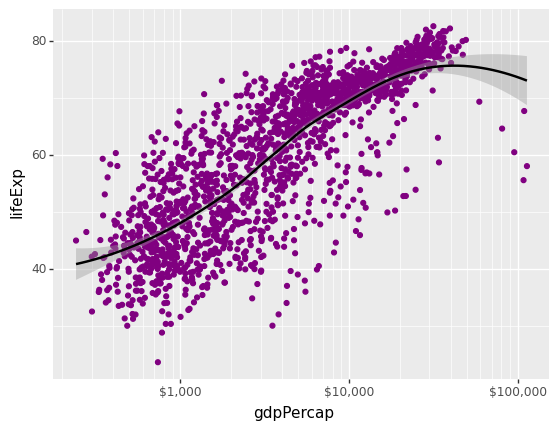

<ggplot: (327365172)>

In [15]:
# Figure 3.11

p = ggplot(data = gapminder,
           mapping = aes(x = 'gdpPercap', y = 'lifeExp'))

p + geom_point(color='purple') + geom_smooth(method = 'loess') + scale_x_log10(labels = currency_format(digits=0, big_mark=','))

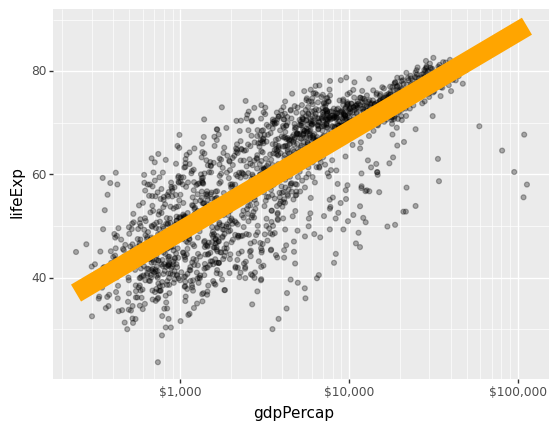

<ggplot: (327309725)>

In [16]:
# Figure 3.12 -- Note that the size parameter in plotnine is calibrated differently!!

p + geom_point(alpha=0.3) + \
    geom_smooth(color='orange', se=False, size=8, method='lm') + \
    scale_x_log10(labels = currency_format(digits=0, big_mark=','))

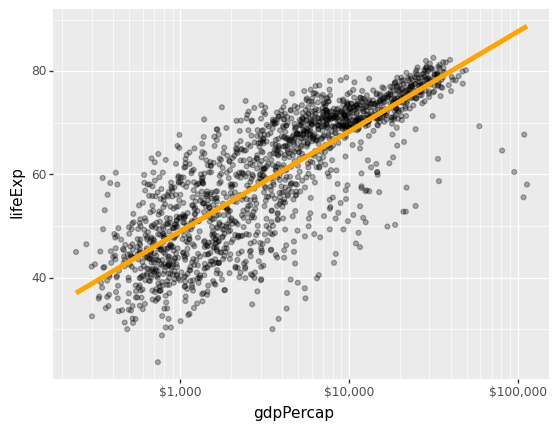

<ggplot: (316646786)>

In [17]:
# Figure 3.12 again, with a different size parameter

p + geom_point(alpha=0.3) + \
    geom_smooth(color='orange', se=False, size=2, method='lm') + \
    scale_x_log10(labels = currency_format(digits=0, big_mark=','))

In [18]:
# An attempt at figure 3.13
# This fails because plotnine does not handle subtitles
# matplotlib does allow them, so if we want it is easy to add them at the end using plt
# (see below)

try:
    p + geom_point(alpha=0.3) + \
        geom_smooth(se=False, size=2, method='lm') + \
        scale_x_log10(labels = currency_format(digits=0, big_mark=',')) + \
        labs(x = 'GDP per capita',
             y = 'Life expectancy in years',
             title = 'Economic growth and life expectancy',
             subtitle = 'Data points are country-years',
             caption = 'Source: Gapminder')
except Exception as e:
    print(e)

"Cannot deal with these labels: {'subtitle'}"


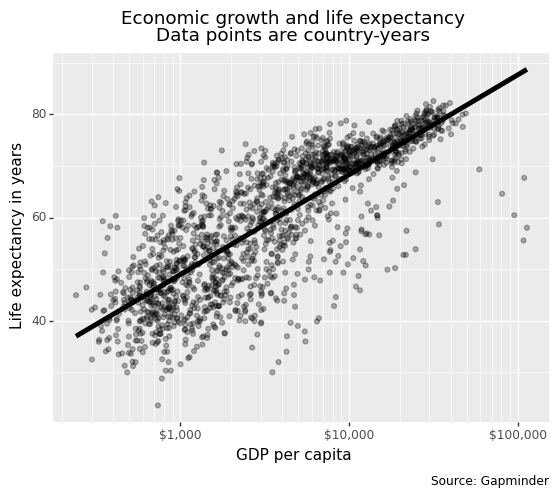

<ggplot: (327525497)>

In [19]:
# Figure 3.13 -- Instead of a subtitle, simply add a second line to the title
# (by inserting '\n')

p + geom_point(alpha=0.3) + \
    geom_smooth(se=False, size=2, method='lm') + \
    scale_x_log10(labels = currency_format(digits=0, big_mark=',')) + \
    labs(x = 'GDP per capita',
         y = 'Life expectancy in years',
         title = 'Economic growth and life expectancy\nData points are country-years',
         caption = 'Source: Gapminder')


Text(0.5, 1.0, 'Data points are country-years')

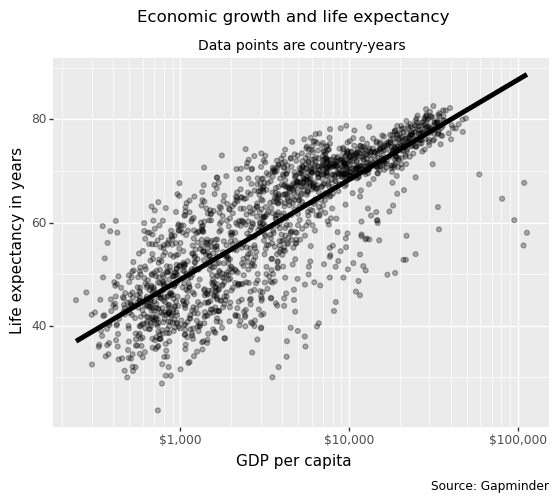

In [20]:
# Figure 3.13 -- Extract into matplotlib,
# then add title (suptitle) and subtitle (title), and adjust fontsize of the latter
# This can easily be adjusted further

p_object = \
p + geom_point(alpha=0.3) + \
    geom_smooth(se=False, size=2, method='lm') + \
    scale_x_log10(labels = currency_format(digits=0, big_mark=',')) + \
    labs(x = 'GDP per capita',
         y = 'Life expectancy in years',
         caption = 'Source: Gapminder')

fig = p_object.draw() # get the matplotlib figure object
ax = fig.axes[0] # get the matplotlib axis (may be more than one if faceted)

fig.suptitle("Economic growth and life expectancy")
ax.set_title('Data points are country-years', fontsize=10)


Healy drops the labels from the next few figures, but there is no reason to.

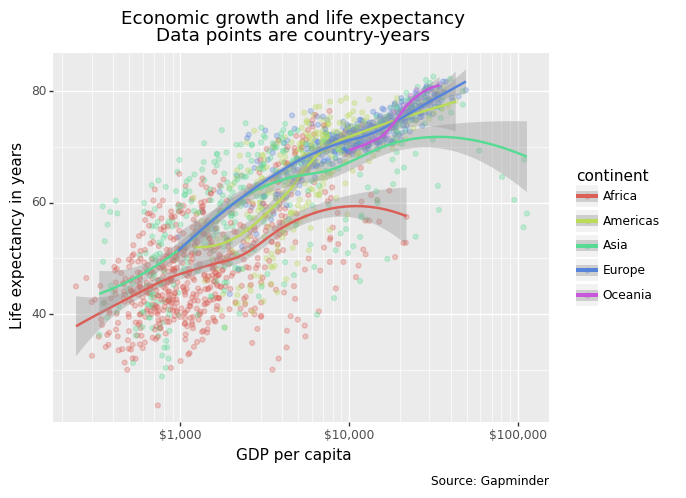

<ggplot: (327646202)>

In [21]:
# Figure 3.14

p2 = ggplot(data = gapminder,
            mapping = aes(x = 'gdpPercap', y = 'lifeExp', 
                          color = 'continent'))

p2 + geom_point(alpha=0.3) + \
    geom_smooth(method='loess') + \
    scale_x_log10(labels = currency_format(digits=0, big_mark=',')) + \
    labs(x = 'GDP per capita',
         y = 'Life expectancy in years',
         title = 'Economic growth and life expectancy\nData points are country-years',
         caption = 'Source: Gapminder')


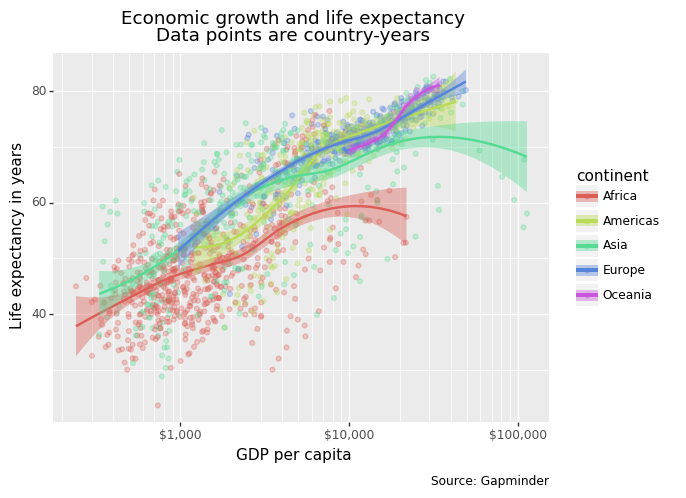

<ggplot: (327729399)>

In [22]:
# Figure 3.15 -- adding a "fill" aesthetic to fill the error ribbon
# Note the difference in legend compared to figure 3.14

p3 = ggplot(data = gapminder,
            mapping = aes(x = 'gdpPercap', y = 'lifeExp', 
                          color = 'continent', fill = 'continent'))

p3 + geom_point(alpha=0.3) + \
    geom_smooth(method='loess') + \
    scale_x_log10(labels = currency_format(digits=0, big_mark=',')) + \
    labs(x = 'GDP per capita',
         y = 'Life expectancy in years',
         title = 'Economic growth and life expectancy\nData points are country-years',
         caption = 'Source: Gapminder')


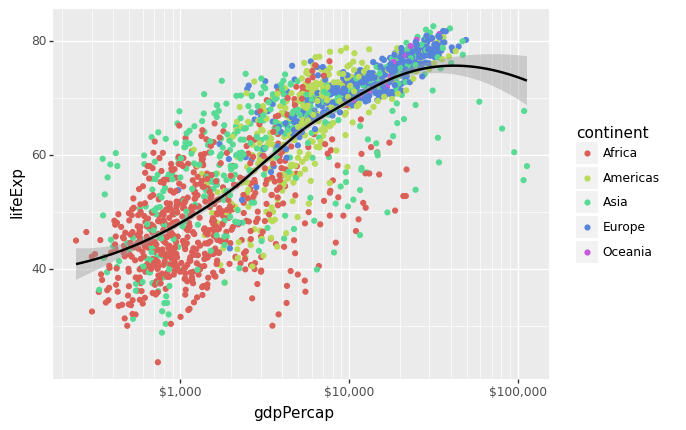

<ggplot: (327809503)>

In [23]:
# Figure 3.16 -- commenting out the labels in order to show the difference
# Note the difference in legend compared to figures 3.14 & 3.15 (back to dots only)

p + geom_point(mapping = aes(color = 'continent')) + \
    geom_smooth(method='loess') + \
    scale_x_log10(labels = currency_format(digits=0, big_mark=',')) # + \
#     labs(x = 'GDP per capita',
#          y = 'Life expectancy in years',
#          title = 'Economic growth and life expectancy\nData points are country-years',
#          caption = 'Source: Gapminder')


In plotnine it is less straightforward to define variable transformations on the fly than it is in R's ggplot.  
Here we define a logged variable ahead of time.

In [24]:
gapminder['logpop'] = gapminder.apply(lambda row: math.log(row['pop']), axis = 1)

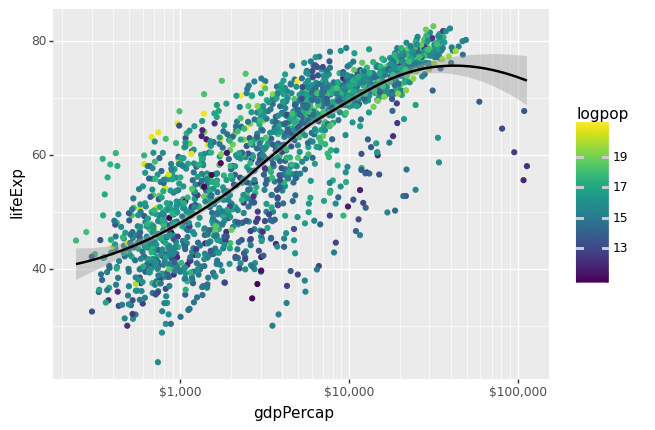

<ggplot: (327801555)>

In [25]:
# Figure 3.17 -- note that plotnine uses a different default color scale

p + geom_point(mapping = aes(color = 'logpop')) + \
    geom_smooth(method='loess') + \
    scale_x_log10(labels = currency_format(digits=0, big_mark=',')) # + \
#     labs(x = 'GDP per capita',
#          y = 'Life expectancy in years',
#          title = 'Economic growth and life expectancy\nData points are country-years',
#          caption = 'Source: Gapminder')


### 3.7 Save your work


In [26]:
# Save a figure as a variable, rather than displaying it

myfigure = \
p + geom_point(mapping = aes(color = 'logpop')) + \
    geom_smooth(method='loess') + \
    scale_x_log10(labels = currency_format(digits=0, big_mark=',')) + \
    labs(x = 'GDP per capita',
         y = 'Life expectancy in years',
         title = 'Economic growth and life expectancy\nData points are country-years',
         caption = 'Source: Gapminder')


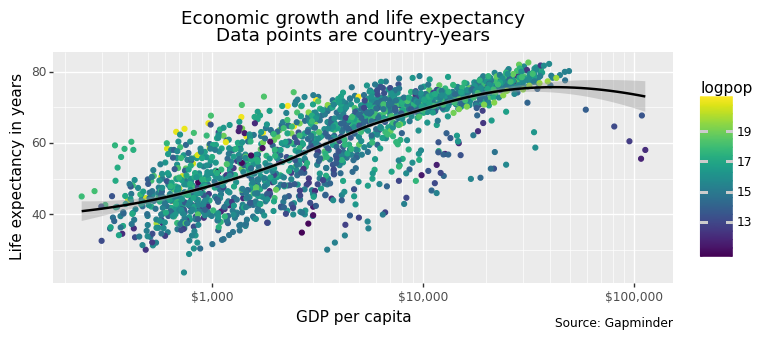

<ggplot: (327959640)>

In [27]:
# To set the size of a figure, use the theme option

myfigure + theme(figure_size = (8, 3))

In [28]:
# To save a figure, simply call the 'save' method.
# The extension specified will drive the format in which it is saved

myfigure.save(filename = 'myfigure.png')

/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: myfigure.png


In [29]:
myfigure.save(filename = 'myfigure.pdf')

/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: myfigure.pdf


In [30]:
# You can of course specify the full pathname

figurefolder = localfolder + 'Figures/'

In [31]:
# It is also possible to adjust figure size at this point

myfigure.save(filename = figurefolder + 'myfigure2.pdf', 
              width=8, height=10, units='in')

/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 8 x 10 in image.
/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: /Users/maurits/Downloads/Figures/myfigure2.pdf


### This completes the figures for chapter 3